In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ad_clicks_csv = pd.read_csv('../Resources/Social_Network_Ads.csv')
ad_clicks = ad_clicks_csv.drop('User ID',1)
ad_clicks

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
clusters = km.fit_predict(ad_clicks.iloc[:,1:]) #fit and assign
ad_clicks["label"] = clusters #labels to column
ad_clicks.head()

,Gender,Age,EstimatedSalary,Purchased,label
0,Male,19,19000,0,0
1,Male,35,20000,0,0
2,Female,26,43000,0,0
3,Female,27,57000,0,1
4,Male,19,76000,0,1


Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


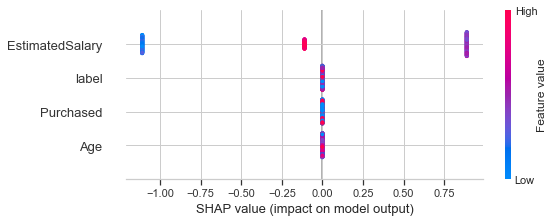

In [7]:
import shap
clusterer = km.fit(ad_clicks.iloc[:,1:])
explainer = shap.KernelExplainer(model=clusterer.predict,data=ad_clicks.iloc[:,1:])
shap_values = explainer.shap_values(ad_clicks.iloc[:,1:])
sns.set(style='whitegrid')
shap.summary_plot(shap_values, ad_clicks.iloc[:,1:])


https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20scikit-learn.html
<br>
https://github.com/slundberg/shap/issues/1052